# Đồ án Thực Hành Lập Trình Khoa Học Dữ Liệu

In [1]:
import sys
sys.executable

'/home/bha/miniconda3/envs/min_ds-env/bin/python'

## Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Thu thập dữ liệu

- Nhóm sử dụng dữ liệu "steam_games.csv" được thu thập sẵn ở trên kaggle. Dữ liệu này là về các game hiện có ở trên steam. Nguồn của dữ liệu được lấy tại: https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022
- LICENSE của dữ liệu là [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/), người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu
- Người ta đã thu thập dữ liệu này bằng cách sử dụng API của steam store và API của web thứ ba (steamspy.com)

## Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [3]:
steam_df = pd.read_csv('steam_games.csv', sep = ';')
steam_df.head()

App ID                         Name  \
0       10               Counter-Strike   
1  1000000                    ASCENXION   
2  1000010                  Crown Trick   
3  1000030  Cook, Serve, Delicious! 3?!   
4  1000040                         细胞战争   

                                   Short Description               Developer  \
0  Play the world's number 1 online action game. ...                   Valve   
1  ASCENXION is a 2D shoot 'em up game where you ...  IndigoBlue Game Studio   
2  Enter a labyrinth that moves as you move, wher...            NEXT Studios   
3  Cook, serve and manage your food truck as you ...     Vertigo Gaming Inc.   
4  这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...           DoubleC Games   

                  Publisher                                Genre  \
0                     Valve                               Action   
1  PsychoFlux Entertainment             Action, Adventure, Indie   
2      Team17, NEXT Studios      Adventure, Indie, RPG, Strategy   
3       Vertigo Gaming Inc.  Action, Indie, Simulation, Strategy   
4             DoubleC Games    Action, Casual, Indie, Simulation   

                                                Tags  Type  \
0  Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...  game   
1  "Shoot Em Up": 186, Metroidvania: 181, Bullet ...  game   
2  Rogue-like: 268, Turn-Based Combat: 254, RPG: ...  game   
3  Typing: 221, Management: 213, Casual: 209, Dif...  game   
4  Action: 22, Casual: 22, Indie: 21, Simulation: 20  game   

                                          Categories  \
0  Multi-player, Valve Anti-Cheat enabled, Online...   
1  Single-player, Partial Controller Support, Ste...   
2  Single-player, Partial Controller Support, Ste...   
3  Multi-player, Single-player, Co-op, Steam Achi...   
4                                      Single-player   

                     Owners  ...  Price  Initial Price  Discount    CCU  \
0  10,000,000 .. 20,000,000  ...    999            999         0  13990   
1               0 .. 20,000  ...    999            999         0      0   
2        200,000 .. 500,000  ...    599           1999        70     99   
3        100,000 .. 200,000  ...   1999           1999         0     76   
4               0 .. 20,000  ...    199            199         0      0   

                                           Languages            Platforms  \
0  English, French, German, Italian, Spanish - Sp...  windows, mac, linux   
1                English, Korean, Simplified Chinese              windows   
2  Simplified Chinese, English, Japanese, Traditi...              windows   
3                                            English         windows, mac   
4                                 Simplified Chinese              windows   

  Release Date Required Age                            Website  \
0    2000/11/1            0                                NaN   
1   2021/05/14            0                                NaN   
2   2020/10/16            0                                NaN   
3   2020/10/14            0  http://www.cookservedelicious.com   
4   2019/03/30            0                                NaN   

                                        Header Image  
0  https://cdn.akamai.steamstatic.com/steam/apps/...  
1  https://cdn.akamai.steamstatic.com/steam/apps/...  
2  https://cdn.akamai.steamstatic.com/steam/apps/...  
3  https://cdn.akamai.steamstatic.com/steam/apps/...  
4  https://cdn.akamai.steamstatic.com/steam/apps/...  

[5 rows x 22 columns]

### Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

Tính số dòng và số cột lưu vào hai biến `num_rows` và `num_cols`

In [5]:
num_rows, num_cols = steam_df.shape
num_rows, num_cols

(55691, 22)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng cho biết thông tin của từng sản phẩm hiện có trong steam, không có dòng nào có ý nghĩa khác với các dòng còn lại.

### Tiến hành kiểm tra các dòng có bị lặp không

Kiểm tra bằng cách lưu kết quả vào biến `have_duplicated_rows`. Biến này có giá trị True nếu dữ liệu có các dòng bị lặp và False nếu ngược lại.

In [4]:
duplicated_list = steam_df.duplicated()

if True in duplicated_list:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
have_duplicated_rows

True

Không có dòng nào bị lặp cả

### Mỗi cột có ý nghĩa gì?

Theo mô tả trên kaggle, các cột có ý nghĩa như sau:
- App ID: ID của sản phẩm
- Name: Tên sản phẩm
- Short Description: Phần giới thiệu sản phẩm
- Developer: Nhà phát triển sản phẩm
- Publisher: Nhà phân phối sản phẩm
- Genre: Các thể loại của sản phẩm
- Tags: Các tag được gán cho sản phẩm (từ người dùng)
- Type: Cho biết sản phẩm thuộc loại game hay là phần cứng (các phần mềm không phải game cũng được gán giá trị là game)
- Categories: Các hạng mục/đặc trưng của sản phẩm
- Owners: Số lượng người sở hữu sản phẩm
- Positive Reviews: Số lượt đánh giá tích cực 
- Negative Reviews: Số lượt đánh giá tiêu cực
- Price: Giá bán hiện tại của game (tính theo USD)
- Initial Price: Giá bán của game thời điểm mới phát hành (USD)
- Discount: Phần trăm giảm giá của game
- CCU: Số lượng người chơi đồng thời cao nhất (tính vào ngày 8/11/2021)
- Languages: Các ngôn ngữ mà sản phẩm có hỗ trợ
- Platforms: Các nền tảng mà sản phẩm hỗ trợ
- Release Date: Ngày phát hành sản phẩm
- Required Age: Độ tuổi giới hạn
- Website: Trang web của nhà phát triển/nhà phân phối
- Header Image: Đường link lưu ảnh của sản phẩm

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [6]:
steam_df.columns

Index(['App ID', 'Name', 'Short Description', 'Developer', 'Publisher',
       'Genre', 'Tags', 'Type', 'Categories', 'Owners', 'Positive Reviews',
       'Negative Reviews', 'Price', 'Initial Price', 'Discount', 'CCU',
       'Languages', 'Platforms', 'Release Date', 'Required Age', 'Website',
       'Header Image'],
      dtype='object')

- Lúc đọc dữ liệu từ "steam_games.csv", ta có thể thấy warning là:"Columns (19) have mixed types.", nghĩa là cột 19(Required Age) có dtype không đồng nhất.<br>
- Release Date cần đưa về dạng datetime<br>

In [7]:
steam_df.head()

App ID                         Name  \
0       10               Counter-Strike   
1  1000000                    ASCENXION   
2  1000010                  Crown Trick   
3  1000030  Cook, Serve, Delicious! 3?!   
4  1000040                         细胞战争   

                                   Short Description               Developer  \
0  Play the world's number 1 online action game. ...                   Valve   
1  ASCENXION is a 2D shoot 'em up game where you ...  IndigoBlue Game Studio   
2  Enter a labyrinth that moves as you move, wher...            NEXT Studios   
3  Cook, serve and manage your food truck as you ...     Vertigo Gaming Inc.   
4  这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...           DoubleC Games   

                  Publisher                                Genre  \
0                     Valve                               Action   
1  PsychoFlux Entertainment             Action, Adventure, Indie   
2      Team17, NEXT Studios      Adventure, Indie, RPG, Strategy   
3       Vertigo Gaming Inc.  Action, Indie, Simulation, Strategy   
4             DoubleC Games    Action, Casual, Indie, Simulation   

                                                Tags  Type  \
0  Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...  game   
1  "Shoot Em Up": 186, Metroidvania: 181, Bullet ...  game   
2  Rogue-like: 268, Turn-Based Combat: 254, RPG: ...  game   
3  Typing: 221, Management: 213, Casual: 209, Dif...  game   
4  Action: 22, Casual: 22, Indie: 21, Simulation: 20  game   

                                          Categories  \
0  Multi-player, Valve Anti-Cheat enabled, Online...   
1  Single-player, Partial Controller Support, Ste...   
2  Single-player, Partial Controller Support, Ste...   
3  Multi-player, Single-player, Co-op, Steam Achi...   
4                                      Single-player   

                     Owners  ...  Price  Initial Price  Discount    CCU  \
0  10,000,000 .. 20,000,000  ...    999            999         0  13990   
1               0 .. 20,000  ...    999            999         0      0   
2        200,000 .. 500,000  ...    599           1999        70     99   
3        100,000 .. 200,000  ...   1999           1999         0     76   
4               0 .. 20,000  ...    199            199         0      0   

                                           Languages            Platforms  \
0  English, French, German, Italian, Spanish - Sp...  windows, mac, linux   
1                English, Korean, Simplified Chinese              windows   
2  Simplified Chinese, English, Japanese, Traditi...              windows   
3                                            English         windows, mac   
4                                 Simplified Chinese              windows   

  Release Date Required Age                            Website  \
0    2000/11/1            0                                NaN   
1   2021/05/14            0                                NaN   
2   2020/10/16            0                                NaN   
3   2020/10/14            0  http://www.cookservedelicious.com   
4   2019/03/30            0                                NaN   

                                        Header Image  
0  https://cdn.akamai.steamstatic.com/steam/apps/...  
1  https://cdn.akamai.steamstatic.com/steam/apps/...  
2  https://cdn.akamai.steamstatic.com/steam/apps/...  
3  https://cdn.akamai.steamstatic.com/steam/apps/...  
4  https://cdn.akamai.steamstatic.com/steam/apps/...  

[5 rows x 22 columns]

In [6]:
col_dtypes=steam_df.dtypes
col_dtypes

App ID                int64
Name                 object
Short Description    object
Developer            object
Publisher            object
Genre                object
Tags                 object
Type                 object
Categories           object
Owners               object
Positive Reviews      int64
Negative Reviews      int64
Price                 int64
Initial Price         int64
Discount              int64
CCU                   int64
Languages            object
Platforms            object
Release Date         object
Required Age         object
Website              object
Header Image         object
dtype: object

In [7]:
steam_df['Required Age'].unique()

array(['0', '15', '12', '18', '16', '17', '10', '7', '5', '180', '13',
       '3', '6', '14', 'MA 15+', '7+', '21+', 0, 18, 12, 17, 16, 13, 15,
       8, 14, 10, 3, 7, 6, 20, 9, 180, 35], dtype=object)

In [8]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes
open_object_dtype(steam_df['Required Age'])
# USK 0 =PEGI 3: phù hợp

{int, str}

- Steam(*https://store.steampowered.com/*) là một nền tảng phân phối trực tuyến, quản lý bản quyền kỹ thuật số, trò chơi điện tử nhiều người chơi, và dịch vụ giao tiếp xã hội trên nền internet phát triển bởi Valve Corporation. Nên các trò chơi điện tử của các quốc gia khác nhau có giới hạn độ tuổi(**Required Age**) khác nhau, sau đây để dễ so sánh và tổng hợp, nhóm mình(em) xin được quy những giới hạn độ tuổi về thang PEGI(*https://pegi.info/what-do-the-labels-mean*).<br>
- Ở cột **Requied Age** ta xử lý chuyển đổi thông tin thành dạng sau đây:<br>
	- 3(PEGI 3) – suitable for all ages, 
	- 7(PEGI 7) – suitable for young children (age>=7)
	- 12(PEGI 12) – suitable for children 12 and over (age>=12)
	- 16(PEGI 16) – suitable for children 16 and over (age>=16)
	- 18(PEGI 18) – Only suitable for adults (age>=18)

In [10]:
def trans_age(type_age):
    l_age=re.findall(r'\d{1,2}',str(type_age))
    age=int(l_age[0])
    if age>=18:
        return 18
    elif age>=16:
        return 16
    elif age>=12:
        return 12
    elif age>=7:
        return 7
    return 3
steam_df['Required Age']=steam_df['Required Age'].apply(trans_age)

In [9]:
# steam_df['Release Date']=pd.to_datetime(steam_df['Release Date'],format='%Y/%m/%d')
steam_df['Release Date']=steam_df['Release Date'].astype('datetime64[s]')

### Với mỗi cột, các giá trị được phân bố như thế nào?

In [12]:
#YOUR CODE HERE

numeric_cols=steam_df[steam_df.select_dtypes(include=[int,'datetime64[ns]']).columns]

def missing_ratio(col):
    return np.round(col.isnull().sum()/len(col)*100,4)
def min(col):
    return col.min()
def max(col):
    return col.max()

num_col_profiles_df=numeric_cols.agg([missing_ratio,min,max])
num_col_profiles_df



App ID  Positive Reviews  Negative Reviews    Price  \
missing_ratio        0.0               0.0               0.0      0.0   
min                 10.0               0.0               0.0      0.0   
max            2190950.0         5943345.0          908515.0  99900.0   

               Initial Price  Discount       CCU         Release Date  \
missing_ratio            0.0       0.0       0.0               0.1778   
min                      0.0       0.0       0.0  1997-06-30 00:00:00   
max                  99900.0      90.0  874053.0  2022-11-11 00:00:00   

               Required Age  
missing_ratio           0.0  
min                     3.0  
max                    18.0

- Ta thực hiện kiểm tra giá trị phân bố của các biến object:
	- Với các cột **Name, Short Description,Website, Header Image** là những cột chứa thông tin đặc trưng của từng game, nên giá trị phân bố là trải rộng đều với nhau
	- Với cột **Tags** chứa thông tin của từng Genre của game nên ở đây ta cũng không xét phân bố như thế nào

In [14]:
steam_df.head()

App ID                         Name  \
0       10               Counter-Strike   
1  1000000                    ASCENXION   
2  1000010                  Crown Trick   
3  1000030  Cook, Serve, Delicious! 3?!   
4  1000040                         细胞战争   

                                   Short Description               Developer  \
0  Play the world's number 1 online action game. ...                   Valve   
1  ASCENXION is a 2D shoot 'em up game where you ...  IndigoBlue Game Studio   
2  Enter a labyrinth that moves as you move, wher...            NEXT Studios   
3  Cook, serve and manage your food truck as you ...     Vertigo Gaming Inc.   
4  这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...           DoubleC Games   

                  Publisher                                Genre  \
0                     Valve                               Action   
1  PsychoFlux Entertainment             Action, Adventure, Indie   
2      Team17, NEXT Studios      Adventure, Indie, RPG, Strategy   
3       Vertigo Gaming Inc.  Action, Indie, Simulation, Strategy   
4             DoubleC Games    Action, Casual, Indie, Simulation   

                                                Tags  Type  \
0  Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...  game   
1  "Shoot Em Up": 186, Metroidvania: 181, Bullet ...  game   
2  Rogue-like: 268, Turn-Based Combat: 254, RPG: ...  game   
3  Typing: 221, Management: 213, Casual: 209, Dif...  game   
4  Action: 22, Casual: 22, Indie: 21, Simulation: 20  game   

                                          Categories  \
0  Multi-player, Valve Anti-Cheat enabled, Online...   
1  Single-player, Partial Controller Support, Ste...   
2  Single-player, Partial Controller Support, Ste...   
3  Multi-player, Single-player, Co-op, Steam Achi...   
4                                      Single-player   

                     Owners  ...  Price  Initial Price  Discount    CCU  \
0  10,000,000 .. 20,000,000  ...    999            999         0  13990   
1               0 .. 20,000  ...    999            999         0      0   
2        200,000 .. 500,000  ...    599           1999        70     99   
3        100,000 .. 200,000  ...   1999           1999         0     76   
4               0 .. 20,000  ...    199            199         0      0   

                                           Languages            Platforms  \
0  English, French, German, Italian, Spanish - Sp...  windows, mac, linux   
1                English, Korean, Simplified Chinese              windows   
2  Simplified Chinese, English, Japanese, Traditi...              windows   
3                                            English         windows, mac   
4                                 Simplified Chinese              windows   

  Release Date Required Age                            Website  \
0   2000-11-01            3                                NaN   
1   2021-05-14            3                                NaN   
2   2020-10-16            3                                NaN   
3   2020-10-14            3  http://www.cookservedelicious.com   
4   2019-03-30            3                                NaN   

                                        Header Image  
0  https://cdn.akamai.steamstatic.com/steam/apps/...  
1  https://cdn.akamai.steamstatic.com/steam/apps/...  
2  https://cdn.akamai.steamstatic.com/steam/apps/...  
3  https://cdn.akamai.steamstatic.com/steam/apps/...  
4  https://cdn.akamai.steamstatic.com/steam/apps/...  

[5 rows x 22 columns]

In [13]:
# object_cols=steam_df[]
# display(object_cols)
object_cols=['Developer', 'Publisher', 'Genre', 'Type', 'Categories', 'Owners', 'Languages', 'Platforms']
# steam_df.select_dtypes(include=[object]).columns
print(object_cols)
# def str_to_list(col):
#     for i in col.index:
#         if type(col.at[i])==str:
#             col.at[i]=col.at[i].split(',')
#     return col
def split_str(st):
    if not (st is np.nan):
        return st.split(',')
    return []

['Developer', 'Publisher', 'Genre', 'Type', 'Categories', 'Owners', 'Languages', 'Platforms']


<h3 style="color: orange">Developer</h3>

In [14]:
pd.set_option("display.max_rows",None)
def lower_str(st):
    if not (st is np.nan):
        return st.lower()
    return ""
def convert_co_inc(st):
    if not (st is np.nan):
        st = re.sub(" *ltd.?[ .]*","ltd.,", st)
        st= re.sub(" *inc.?[ .]*","inc.,", st)
        st= re.sub(" *llc.?[ .]*","llc.,", st)
        return re.sub(r" *, *(?!inc|ltd|llc)",";", st)
    return ""
def split_dev(st):
    if not (st is np.nan):
        return st.split(';')
    return []

steam_df.Developer.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().replace("",np.nan).value_counts()

choice of games                                                                               140
creobit                                                                                       129
laush dmitriy sergeevich                                                                      110
sokpop collective                                                                             101
koei tecmo games co.,ltd.                                                                      94
reforged group                                                                                 89
dnovel                                                                                         86
boogygames studios                                                                             80
hosted games                                                                                   79
elephant games                                                                                 75
blender games       

<h3 style="color: orange">Publisher</h3>

In [10]:
steam_df.Publisher.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().replace("",np.nan).value_counts()

big fish games                                                                                                                   423
8floor                                                                                                                           243
sega                                                                                                                             187
strategy first                                                                                                                   151
square enix                                                                                                                      151
thq nordic                                                                                                                       144
choice of games                                                                                                                  140
sekai project                                                        

<h3 style="color: orange">Genre</h3>

In [12]:
col=steam_df.Genre
col=col.apply(split_str)
col=col.explode()
col=col.str.strip()
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

28
Indie                    25.256826
Action                   15.122526
Casual                   14.057667
Adventure                13.640761
Strategy                  6.934632
Simulation                6.897078
RPG                       6.068360
Early Access              3.911272
Free to Play              2.159633
Sports                    1.696900
Racing                    1.371650
Massively Multiplayer     0.929285
Utilities                 0.434091
Design & Illustration     0.258418
Animation & Modeling      0.204952
Education                 0.201769
Video Production          0.157215
Audio Production          0.124117
Violent                   0.106931
Software Training         0.104385
Game Development          0.101203
Photo Editing             0.066832
Gore                      0.063013
Web Publishing            0.056648
Sexual Content            0.034371
Nudity                    0.028642
Accounting                0.010184
Movie                     0.000636
Name: Genre, dtyp

<h3 style="color: orange">Type</h3>

In [13]:
ratio_value=steam_df.Type.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

2
game        99.998204
hardware     0.001796
Name: Type, dtype: float64


<h3 style="color: orange">Categories</h3>

In [14]:
col=steam_df.Categories
col=col.apply(split_str)
col=col.explode()
col=col.str.strip()
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

36
Single-player                 27.199770
Steam Achievements            14.322162
Steam Cloud                    7.442359
Full controller support        6.210592
Multi-player                   5.988916
Steam Trading Cards            4.814137
Partial Controller Support     4.113034
PvP                            3.696345
Co-op                          2.936164
Steam Leaderboards             2.880222
Online PvP                     2.627176
Remote Play Together           2.540911
Shared/Split Screen            2.260679
Shared/Split Screen PvP        1.633816
Online Co-op                   1.558530
Stats                          1.529775
Shared/Split Screen Co-op      1.280912
Remote Play on TV              1.014796
Cross-Platform Multiplayer     0.910754
Includes level editor          0.866315
Steam Workshop                 0.848539
In-App Purchases               0.705286
Captions available             0.542688
Remote Play on Tablet          0.453809
MMO                            0.4114

<h3 style="color: orange">Owners</h3>

In [20]:
def split_owner(st):
    if not(st is np.nan):
        st=st.replace(',','')
        value=st.split('..')
        return (int(value[0]),int(value[1]))
    return np.nan
ratio_value=steam_df.Owners.apply(split_owner).value_counts(normalize=True).multiply(100)
steam_df['Owners'] = steam_df.Owners.apply(split_owner)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

13
(0, 20000)                68.362931
(20000, 50000)            13.081108
(50000, 100000)            6.634824
(100000, 200000)           4.523173
(200000, 500000)           3.882135
(500000, 1000000)          1.675316
(1000000, 2000000)         0.944497
(2000000, 5000000)         0.601533
(5000000, 10000000)        0.174175
(10000000, 20000000)       0.073621
(20000000, 50000000)       0.037708
(50000000, 100000000)      0.007182
(200000000, 500000000)     0.001796
Name: Owners, dtype: float64


<h3 style="color: orange">Languages</h3>

In [16]:
def clean_lang(lang_str):
    if not (lang_str is np.nan):
        return lang_str.replace('\r\n',',').replace('[b]*[/b]','').replace(';','').replace('#lang_slovakian', 'Slovak')
    return ""

col=steam_df.Languages
# Xử lý dữ liệu
col=col.apply(clean_lang).apply(split_str)
col=col.explode()
col=col.str.strip()
col=col.apply(lambda st: st.split('-')[0].strip())
col=col.replace('',np.nan)

# Xem các giá trị trong cột được phân bố như thế nào
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

75
English                            27.247606
Spanish                             7.398674
German                              6.932024
French                              6.637402
Russian                             6.388259
Simplified Chinese                  6.318558
Portuguese                          5.324949
Japanese                            5.125733
Italian                             4.600258
Korean                              3.263089
Traditional Chinese                 3.117755
Polish                              2.657531
Turkish                             1.780586
Dutch                               1.522544
Czech                               1.162670
Swedish                             1.011899
Ukrainian                           0.953073
Hungarian                           0.950601
Arabic                              0.887821
Danish                              0.848769
Thai                                0.839871
Finnish                             0.797853
Norwegi

<h3 style="color: orange">Platforms</h3>

In [17]:
col = steam_df['Platforms']
col=col.apply(split_str)
col=col.explode()
col=col.str.strip()
ratio_value=col.value_counts(normalize=True).multiply(100)
num_value=len(ratio_value)
print(num_value)
print(ratio_value)

3
windows    72.396754
mac        16.605118
linux      10.998128
Name: Platforms, dtype: float64


## Đưa ra các câu hỏi

### Câu 1: Các thể loại có lượt người tag nhiều nhất. Tương quan giữa lượt tag thể loại của game đó với thể loại chính thức của game?

**Ý nghĩa khi trả lời câu hỏi:** 
* Có được cái nhìn tổng quan về từng thể loại, thể loại được người chơi công nhận nhiều nhất (thể loại mỗi game do chính người chơi tự nhìn nhận và định nghĩa)
* Biết được liệu rằng thể loại chính thức của game có giống với những gì mà người dùng trải nghiệm hay không?

**Các bước cần làm để để trả lời câu hỏi:**

* Đầu tiên ta cần đưa thông tin về lượt tag trong từng game về dưới dạng dictionary với key là thể loại và value là số lượng người dùng tag game với thể loại đó
* Tiếp đến để xét tổng quan lượt tag của từng thể loại, ta cần cộng các giá trị lượt tag của từng thể loại xuyên suốt tất cả các game với nhau và lưu vào một Series với index là tên thể loại và value là tổng số lượt tag của thể loại đó
* Với ý thứ hai, ta sẽ xét các thể loại (genres) chính thức của game bằng cách chấm điểm dựa vào số lượt tag của từng thể loại, cụ thể như sau:
    * Đối với các thể loại chính thức có ở trong phần tag, ta tính điểm bằng tỉ lệ giữa lượt tag của thể loại đó với tổng lượt tag
    * Đối với các thể loại chính thức nhưng không có trong phần tag thì ta cho điểm bằng 0
    * Từ điểm của từng thể loại, ta tính trung bình điểm bằng cách lấy tổng điểm của các thể loại chính thức đã tính ở trên chia cho tổng số thể loại.

## Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi

### Tiền xử lý và phân tích cho câu 1:

**Bước 1:** Ta tạo một dataframe mới có 2 cột là `Genre` và `Tags` lấy từ dataframe gốc, với cột `Tags`, ta tiến hành chuyển đổi nó về dạng dictionary với key là thể loại và values là số lượng người dùng tag game với thể loại đó.

In [ ]:
def split_genre(x):
    if x is np.nan:
        return np.nan
    return [i.strip() for i in x.split(',')]
def split_tags(x):
    if x is np.nan:
        return []
    return [i.strip() for i in x.split(',')]
genres_tag_df = steam_df[["Genre", "Tags"]].copy()
genres_tag_df["Genre"] = genres_tag_df["Genre"].apply(split_genre)
genres_tag_df["Tags"] = genres_tag_df["Tags"].apply(split_tags)
def convert_to_dict(x: list):
    res = {}
    if len(x) == 0:
        return np.nan
    for string in x:
        key, val = string.split(': ')
        res[key] = int(val)
    return res
genres_tag_df["Tags"] = genres_tag_df["Tags"].apply(convert_to_dict)
genres_tag_df

Để tiện cho việc xử lý các bước sau, ta tiến hành bỏ đi các dòng có giá trị NaN.

In [ ]:
print('Before:', genres_tag_df.shape[0])
genres_tag_df = genres_tag_df.dropna()
print('After:', genres_tag_df.shape[0])

Có thể thấy số lượng các dòng bị bỏ đi là không đáng kể nên nhìn chung việc này sẽ không ảnh hưởng mấy đến kết quả cuối cùng.

**Bước 2:** Sau khi đã chuyển dữ liệu của cột Tags thành dictionary rồi thì ta tiến hành tính tổng số lượt tag của từng thể loại, lưu kết quả vào Series `tolal_num_tags` với mỗi dòng biểu thị số lượng tổng mỗi tag.

In [ ]:
c = Counter()
def sum_tags(row):
    c.update(row)
    return row
genres_tag_df["Tags"].apply(sum_tags)
total_num_tags = pd.Series(c, index = c.keys())
total_num_tags = total_num_tags.sort_values(ascending = False)
print(total_num_tags)
print(len(total_num_tags))

Ta có thể thấy được top 5 thể loại đang được người chơi để ý và công nhận nhất là `Action`, `Adventure`, `Indie`, `Singleplayer`, `Casual`

**Bước 3:** Chấm điểm cho các game dựa vào độ tương đồng giữa thể loại chính thức và thể loại do người chơi tag. Đầu tiên ta tiến hành tính điểm như đã mô tả ở trên và lưu dữ liệu vào một Series có tên `score`.

In [ ]:
def scoring(row):
    res = 0
    genres = row["Genre"]
    tags = row["Tags"]
    for genre in genres:
        if genre in tags.keys():
            score = tags[genre] / sum(tags.values())
        else:
            score = 0
        res += score
    return res/len(genres)
score = genres_tag_df.apply(scoring, axis = 1)
print(score)
print('Mean:', score.mean())

Theo như ta thấy, điểm trung bình độ tương đồng có vẻ thấp. Một cách để giải thích cho việc này chính là các thể loại do chính người dùng tự định nghĩa và tag là rất đa dạng, ta có thể nhìn thấy, số lượng thể loại được tag lên đến hơn 400 thể loại khác nhau trong khi số lượng thể loại chính thức do chính nhà phát hành đưa ra chỉ đâu đó tầm 30 thể loại. 
Bây giờ ta cùng thử lọc ra các game có độ tương đồng lớn hơn 0.5 xem sao.

In [ ]:
gt05 = pd.Series(score.loc[score>=0.5])
print(gt05)
print(len(gt05)/len(score))

Bây giờ ta cùng thử xem liệu các game có số lượng trên 0.5 có liên quan gì tới số lượng người sở hữu không

Ta tạo một dataframe có hai cột là `Score` và `Owners` lần lượt là số điểm tương đồng và số lượng người sở hữu của game đó.

In [ ]:
owners = steam_df["Owners"].apply(split_owner)
score_owner_df = gt05.to_frame(name = "Score").join(owners)
score_owner_df

Tiếp đến, ta sẽ đếm số lượng đạt game 0.5 theo từng khoảng lượng người dùng.

In [ ]:
count_score_owner = score_owner_df.groupby(["Owners"])["Owners"].count()
count_score_owner

Thử trực quan hóa kết quả bằng biểu đồ bar

In [ ]:
ax = count_score_owner.plot.barh()
ax.set_xlabel("Nums of games with high score")
ax.set_title("Nums of high score games according to owners range")

Qua đây có thể thấy được là game càng có nhiều người chơi thì điểm tương đồng càng ít, điều này là vì càng nhiều người chơi thì sẽ có càng nhiều tag và độ đa dạng của tag sẽ càng nhiều, từ đó khiến tới việc điểm tương đồng bị giảm

### Câu 2: Phân tích các game được nhiều người sở hữu dựa trên dòng game, phân lớp của game và yếu tố giới thiệu game.

Nếu bản thân là một người muốn gia nhập ngành game và muốn khảo sát thị hiếu của người tiêu dùng của game hoặc muốn quảng bá cho game thì nên phát triển dòng game nào để khởi đầu an toàn, hoặc nên dùng những keyword nào để quảng bá cho game

**Bước 1**: Chọn ra những đặc trưng cần thiết cần thiết.  
Ở đây, em chọn ra genre, categories và short description của game

In [ ]:
col = ['Genre', 'Categories', 'Short Description']
option = ['200,000,000 .. 500,000,000', '50,000,000 .. 100,000,000', '20,000,000 .. 50,000,000', '10,000,000 .. 20,000,000', '5,000,000 .. 10,000,000', '2,000,000 .. 5,000,000']
df = steam_df[col][steam_df.Owners.isin(option)].copy()

**Bước 2:** Tiền xử lý song song với phân tích. Việc đơn giản là thống kê ra 5 dòng game và thể loại game được ưa chuộng nhất hiện nay.

In [ ]:
def split(x):
    if x is np.nan:
        return np.nan
    return [i.strip() for i in x.split(',')]

def convert_to_dict(x: list):
    res = {}
    if len(x) == 0:
        return np.nan
    for string in x:
        key, val = string.split(': ')
        res[key] = int(val)
    return res

genres = df.Genre.apply(split_genre).explode(ignore_index=True)
genres_count = genres.value_counts()
genres_count[:5]

In [ ]:
categories = df.Categories.apply(split).explode(ignore_index=True)
categories_count = categories.value_counts()
categories_count

Dễ thấy, các tựa game hành động, RPG hay chơi miễn phí chiếm số lượng lớn trong việc quyết định mua game của khách hàng.  
Trong khi đó, phân loại game được ưa chuộng là đơn người chơi, đa người chơi và các hợp tác với nền tảng phát hành là Steam, nên từ đây nếu muốn phát hành game trên Steam thì nhà phát hành có thể cân nhắc đến việc hợp tác với Steam, đưa ra những sự kiện hấp dẫn người mua.

**Bước 3**: Phân tích những keyword nào trong lời mô tả của các game chiếm nhiều nhất.

Ở đây em sử dụng thống kê số học (TF-IDF) để thống kê các từ vựng có trong câu và tần suất các từ đó.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df['Short Description'])
k = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

Tiếp theo em dùng KMeans để tiến hành chia cụm cho những keyword vừa tìm được và tìm số cụm phù hợp bằng đánh giá Tổng bình phương kết hợp với phương pháp Elbow


In [ ]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Ở đây, số cụm hầu như là tuyến tính nên bản thân em chọn 3 cụm để đưa ra nhiều góc nhìn về các keywords.

In [ ]:
# Get clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
game_cluster = pd.DataFrame(list(zip(df['Short Description'],labels)),columns=['title','cluster'])

In [ ]:
from wordcloud import WordCloud

for k in range(true_k):
    text = game_cluster[game_cluster.cluster == k]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)

   # Create subplot
    plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
    plt.plot()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()

Các từ khóa trong wordcloud sẽ được quan tâm và đưa vào phần giới thiệu của game. Việc phân tích này còn giúp ích cho việc game dễ tìm kiếm hơn so với việc không thêm những keyword phổ biến.

### Câu 3: Quan sát các thể loại game được phát hành từ năm 2017 đến năm 2022. Những thể loại nào luôn được các nhà sản xuất ưu chuộng nhất. Và liệu rằng, những thể loại game này có thật sự nhận được sự ủng hộ nhiệt tình từ người chơi.

**Ý nghĩa khi trả lời câu hỏi:** 
* Ta sẽ thống kê được các thể loại game đang được các nhà sản xuất ưu ái hơn. Có lẽ vì nhu cầu thị trường và xu hướng hiện tại nên các thể loại game này cũng được các nhà sản xuất tập trung hơn.
* Ngoài ra, ta cũng quan sát được thái độ của người chơi đối với các thể loại này. Cho một cái nhìn tổng quan, liệu rằng với số lượng áp đảo như vậy thì các thể loại game này có thật sự nhận được sự quan tâm hay không.

**Các bước cần làm để để trả lời câu hỏi:**
* Đầu tiên, ta sẽ thống kê số lượng các thể loại game lên theo từng năm (cụ thể từ năm 2017 đến 2022) và lưu trữ lần lượt trong các dataframe riêng.
* Tiếp theo, ta sẽ tính phần trăm của từng thể loại trong từng năm và dùng Pie Chart để visualize phục vụ cho việc quan sát và nhận xét.
* Sau đó ta thống kê số lượt review từ người chơi đối với thể loại game chiếm số lượng áp đảo để đánh giá xem thái độ của họ về thể loại game này như thế nào.

**Bước 1**: Trước tiên, ta thực hiện tiền xử lý cột `Release Date`, chỉ lấy ra **năm** phát hành game (lưu trữ dưới dạng `list`) để phục vụ cho bước tiếp theo.

In [10]:
year_df = list()
for d in steam_df['Release Date']:
    year_df.append(d.year)

**Bước 2**: Trong `steam_df` ta chọn ra 2 cột liên quan là `Name`, `Genre` sau đó kết hợp `year_df` ở bước 1 để tạo thành một Dataframe (`genres`) mới gồm 3 cột `Release Year`, `Name`, `Genre`.

In [11]:
genres = steam_df[['Genre','Name']]
genres['Genre'] = genres['Genre'].str.split(', ')
genres ['Release Year'] = year_df
genres = genres.explode('Genre')
genres = genres[['Release Year','Name','Genre']]
genres

Release Year                            Name         Genre
0            2000.0                  Counter-Strike        Action
1            2021.0                       ASCENXION        Action
1            2021.0                       ASCENXION     Adventure
1            2021.0                       ASCENXION         Indie
2            2020.0                     Crown Trick     Adventure
...             ...                             ...           ...
55689        2019.0  Fantasy Sino-Japanese War 幻想甲午      Strategy
55689        2019.0  Fantasy Sino-Japanese War 幻想甲午  Early Access
55690        2019.0                   Bouncing Hero        Action
55690        2019.0                   Bouncing Hero        Casual
55690        2019.0                   Bouncing Hero         Indie

[157271 rows x 3 columns]

**Bước 3**: Ta tiến hành thống kê số lượng mỗi thể loại theo mỗi năm. Ở đây, vì có một số thể loại chỉ chiếm một số lượng nhỏ, gây khó khăn trong việc quan sát sau khi visualize nên ta sẽ quy ước những thể loại có số lượng không đáng kể đó bằng cách:
* Những thể loại nào mà có lượt phát hành game dưới 50 lần sẽ được cộng dồn vào Others. Others sẽ là tổng số lượng phát hành cho các thể loại game "thiểu số" đó.

In [12]:
def genre_by_year (year):
    genres_year = genres['Genre'][genres['Release Year'] == year]
    genres_year_count = genres_year.value_counts() 
    genres_year_count = genres_year_count.to_frame().rename(columns = {'Genre': 'Sum each genre'})

    sum_of_others = 0
    for i in range(len(genres_year_count)):
        if (genres_year_count['Sum each genre'][i] <= 100):
            sum_of_others += genres_year_count['Sum each genre'][i] 

    genres_df = genres_year_count[genres_year_count['Sum each genre'] > 100]

    genres_df.loc['Others'] = [sum_of_others]
    genres_df
    
    return genres_df

In [15]:
g_2017 = genre_by_year(2017)
g_2018 = genre_by_year(2018)
g_2019 = genre_by_year(2019)
g_2020 = genre_by_year(2020)
g_2021 = genre_by_year(2021)
g_2022 = genre_by_year(2022)

# Vi du output o phan nay: Doi voi nam 2017
g_2017.head(100)

Sum each genre
Indie                            4263
Action                           2656
Casual                           2380
Adventure                        2289
Simulation                       1138
Strategy                         1081
RPG                               852
Early Access                      593
Free to Play                      393
Sports                            337
Racing                            215
Massively Multiplayer             176
Others                            600

**Bước 4**: Ta sẽ tính phần trăm cho các thể loại game ở mỗi năm.

In [16]:
def ratio_df(data):
    ratios_df = pd.DataFrame(round(data['Sum each genre'].div(data['Sum each genre'].sum()
                                                                           , axis=0) * 100, 5))
    ratios_df = ratios_df.rename(columns = {'Sum each genre': 'Ratios'})
    return ratios_df

In [23]:
ratio_2017 = ratio_df(g_2017)
ratio_2018 = ratio_df(g_2018)
ratio_2019 = ratio_df(g_2019)
ratio_2020 = ratio_df(g_2020)
ratio_2021 = ratio_df(g_2021)
ratio_2022 = ratio_df(g_2022)

# Vi du output o phan nay: Doi voi nam 2017
ratio_2017.head(100)

Ratios
Indie                  25.11636
Action                 15.64838
Casual                 14.02227
Adventure              13.48613
Simulation              6.70477
Strategy                6.36894
RPG                     5.01974
Early Access            3.49378
Free to Play            2.31544
Sports                  1.98551
Racing                  1.26672
Massively Multiplayer   1.03694
Others                  3.53503

**Bước 5**: Ta sẽ dùng Pie Chart để quan sát phần trăm các thể loại game ở mỗi năm.

In [60]:
def pie_chart(data, year):
    colors = ['#FFFF99','#99FF99','#FF99CC', '#FF9966', '#6699FF', '#FF3300',
             '#3300FF', '#3399FF', '#CC6666', '#440000', '#CCCCCC', '#669966', '#9933FF',
             '#CCFF33', '#FFCC66', '#FFCCCC']
    ax = data.plot.pie(y = 'Ratios',colors = colors, fontsize = 5)
    ax.set(xlabel=None)
    labels=data.index.unique()
    plt.legend(loc="right", fontsize=10)
    plt.legend(labels, bbox_to_anchor=(1.5,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
    plt.title('Phần trăm các thể loại game năm ' + str(year), fontsize = 7, fontweight='bold')
    
    return ax

<AxesSubplot:title={'center':'Phần trăm các thể loại game năm 2019'}, ylabel='Ratios'>

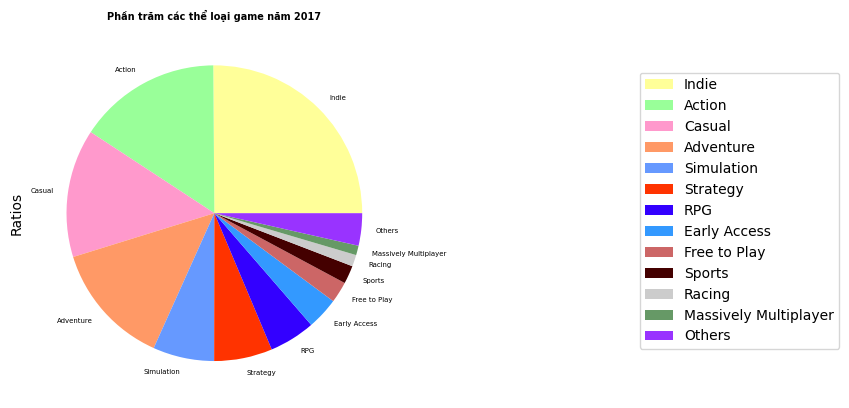

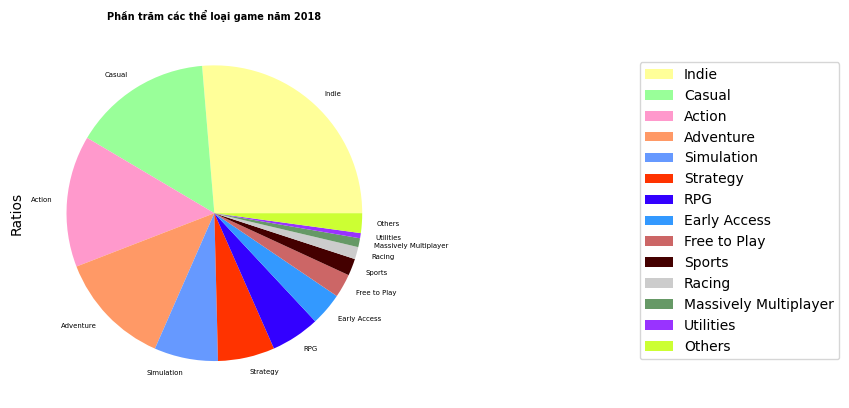

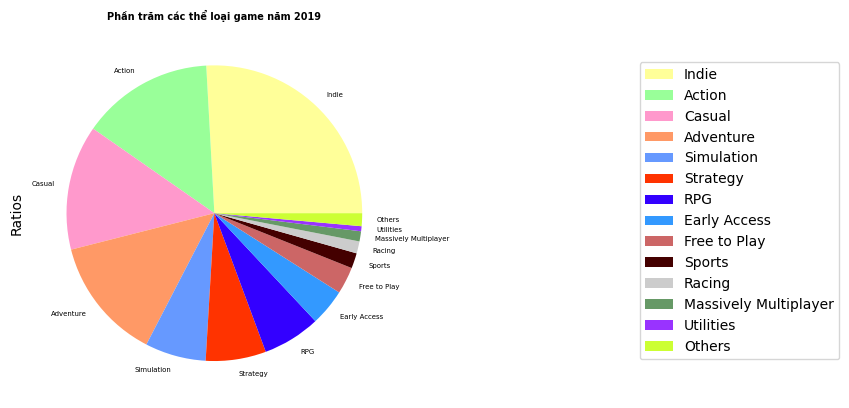

In [61]:
pie_chart(ratio_2017, 2017)
pie_chart(ratio_2018, 2018)
pie_chart(ratio_2019, 2019)

<AxesSubplot:title={'center':'Phần trăm các thể loại game năm 2022'}, ylabel='Ratios'>

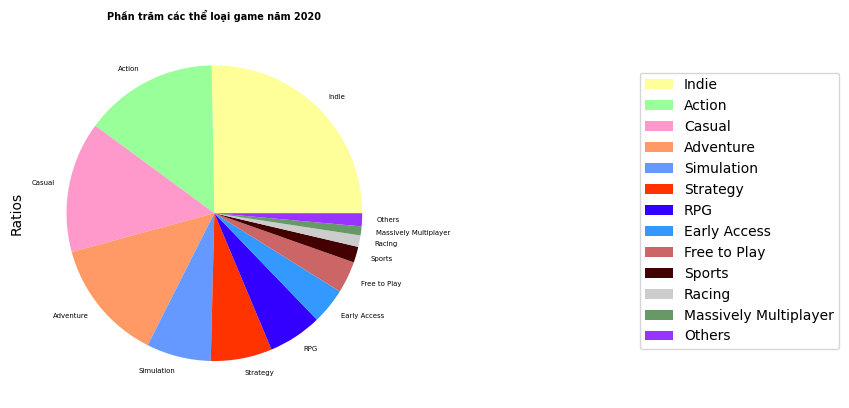

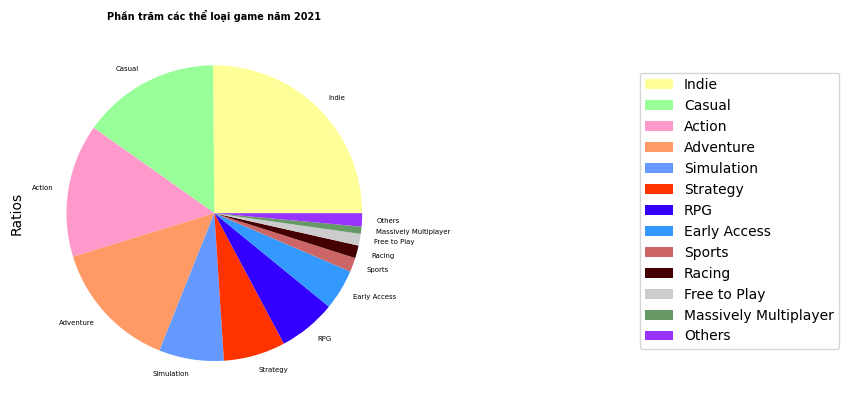

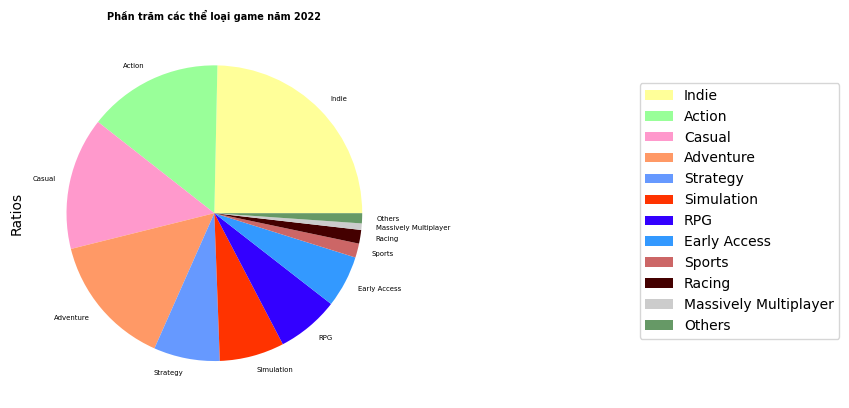

In [62]:
pie_chart(ratio_2020, 2020)
pie_chart(ratio_2021, 2021)
pie_chart(ratio_2022, 2022)

#### **Nhận xét:**

* Ta thấy rõ, trong vòng 6 năm từ năm 2017 đến năm 2022, 4 thể loại bao gồm: **Indie**, **Action**, **Casual**, **Adventure** luôn có phần trăm cao nhất, đồng nghĩa với việc các nhà sản xuất rất ưu ái đối với các thể loại game này.
* Ngoài ra, **Indie** luôn là thể loại game được sản xuất và phát hành nhiều nhất (luôn chiếm hơn 25% tổng các thể loại game được sản xuất), dù đi qua giai đoạn 6 năm nhưng thể loại game này vẫn duy trì được độ yêu thích đối với các nhà sản xuất.

Vậy đối với thể loại **Indie**, liệu người chơi có thực sự yêu thích thể loại game này hay không?

**Tìm hiểu thêm:**

**Game Indie** là thuật ngữ dùng để chỉ các trò chơi độc lập được phát triển và phát hành bởi các cá nhân, hoặc nhóm nhỏ không có nhiều kinh phí đầu tư lớn như các nhà sản xuất game nổi tiếng trên thế giới. Thông thường những tựa game Indie mang nhiều phong cách thể hiện, bởi các trò chơi này không chú trọng đến việc mang về doanh số lợi nhuận để bù đắp cho chi phí sản xuất. Vì thế số tiền để làm ra một trò chơi Indie khá khiêm tốn.

Tiếp theo, ta sẽ thống kê dựa trên số lượt review tích cực và tiêu cực ở 2 cột Positive Review và Negative Review để xem rằng trong 6 năm từ 2017 đến 2022, liệu người chơi có thật sự yêu thích thể loại game Indie hay không.

**Bước 6**: Ta chọn từ `steam_df` ra các cột dữ liệu gồm: `Genre`, `Positive Reviews` và `Negative Reviews`. Sau đó thực hiện merge với cột `Release Year` đã xử lý ở bước 1 để có thể gom dữ liệu theo năm phát hành.

In [51]:
reviews = steam_df[['Genre','Negative Reviews', 'Positive Reviews']]
reviews['Release Year'] = year_df
reviews

Genre  Negative Reviews  \
0                                   Action              5199   
1                 Action, Adventure, Indie                 5   
2          Adventure, Indie, RPG, Strategy               646   
3      Action, Indie, Simulation, Strategy               115   
4        Action, Casual, Indie, Simulation                 1   
...                                    ...               ...   
55686                            Education                 3   
55687             Adventure, Casual, Indie                 0   
55688                 Animation & Modeling                19   
55689   Indie, RPG, Strategy, Early Access                 2   
55690                Action, Casual, Indie                 0   

       Positive Reviews  Release Year  
0                201215        2000.0  
1                    27        2021.0  
2                  4032        2020.0  
3                  1575        2020.0  
4                     0        2019.0  
...                 ...           ...  
55686                12        2019.0  
55687                 2        2019.0  
55688                12        2019.0  
55689                 2        2019.0  
55690                10        2019.0  

[55691 rows x 4 columns]

**Bước 7**: Ở bước này, ta tiến hành sắp xếp lại các cột cho dễ quan sát. Sau đó, dùng `explode()` và `split()` để xử lý cột dữ liệu `Genre`.

In [52]:
reviews = reviews[['Release Year', 'Genre', 'Positive Reviews', 'Negative Reviews']]
reviews['Genre'] = reviews['Genre'].str.split(', ')
reviews = reviews.explode('Genre')
reviews

Release Year         Genre  Positive Reviews  Negative Reviews
0            2000.0        Action            201215              5199
1            2021.0        Action                27                 5
1            2021.0     Adventure                27                 5
1            2021.0         Indie                27                 5
2            2020.0     Adventure              4032               646
...             ...           ...               ...               ...
55689        2019.0      Strategy                 2                 2
55689        2019.0  Early Access                 2                 2
55690        2019.0        Action                10                 0
55690        2019.0        Casual                10                 0
55690        2019.0         Indie                10                 0

[157271 rows x 4 columns]

**Bước 8**: Chọn ra các trong Dataframe `reviews` thể loại game **Indie** và thời gian phát hành từ năm 2017 đến 2022. Sau đó dùng `groupby()` để gom dữ liệu theo các năm.


In [78]:
reviews = reviews[reviews['Release Year'] >= 2017]
reviews = reviews[reviews['Genre'] == 'Indie']
num_reviews = reviews.groupby('Release Year')[['Positive Reviews', 'Negative Reviews']].sum()
num_reviews

Positive Reviews  Negative Reviews
Release Year                                    
2017.0                 3878052            620109
2018.0                 4454174            537704
2019.0                 2740572            370438
2020.0                 3970217            487088
2021.0                 2740608            405145
2022.0                 1598771            281798

**Bước 9**: Ta sẽ tính phần trăm số lượt review tích cực và tiêu cực dựa trên tổng số lượt review.

In [79]:
pos_ratio = (num_reviews['Positive Reviews']/(num_reviews['Positive Reviews'] + num_reviews['Negative Reviews'])
                                                                                            )*100
neg_ratio = (num_reviews['Negative Reviews']/(num_reviews['Positive Reviews'] + num_reviews['Negative Reviews'])
                                                                                            )*100
ratio_reviews = num_reviews.copy()
ratio_reviews['Positive Reviews'] = pos_ratio
ratio_reviews['Negative Reviews'] = neg_ratio
ratio_reviews

Positive Reviews  Negative Reviews
Release Year                                    
2017.0               86.214166         13.785834
2018.0               89.228423         10.771577
2019.0               88.092677         11.907323
2020.0               89.072141         10.927859
2021.0               87.120890         12.879110
2022.0               85.015280         14.984720

**Bước 10**: Cuối cùng, ta sẽ dùng **Stacked barchart** để visualize lên và xem thử tỉ lệ giữa số lượt review tích cực và tiêu cực sẽ như thế nào trong vòng 6 năm từ 2017 đến 2022.

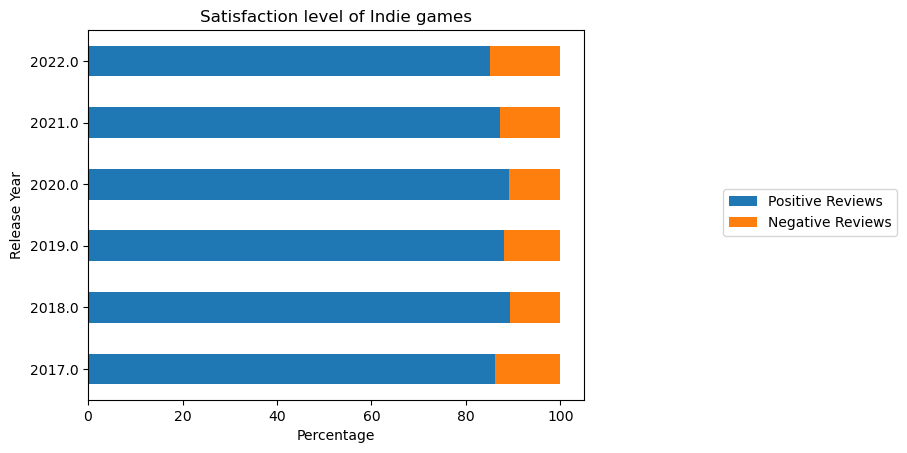

In [86]:
ax = ratio_reviews.plot.barh(stacked=True,
                      title='Satisfaction level of Indie games')
ax.set_xlabel('Percentage');
plt.legend(bbox_to_anchor=(1.4,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

**Nhận xét**:
* Nhìn vào chart, ta thấy rõ sự chênh lệch giữa phần trăm số lượt review tích cực với số lượng review tiêu cực.
* Số lượng review tích cực chiếm áp đảo thể hiện sự yêu thích của người chơi đối với thể loại **Indie** này. Cũng vì đó mà các nhà sản xuất game lại chú ý đánh vào thể loại game này nhiều hơn vì thị hiếu người chơi.
